In [1]:
import json
from glob import glob
from pathlib import Path
from typing import List, Tuple, Union

import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from matplotlib.figure import Figure


In [2]:
def get_metrics(
    glob_pattern: str,
    prompts: Union[List[str], Tuple[str]],
    model_name: str,
    stage: str,
):
    metric_files = glob(glob_pattern)
    print(metric_files)

    assert len(metric_files) == len(
        prompts
    ), f"The number of prompts: {len(prompts)} and csv files: {len(metric_files)} should be equal"

    metric_files.sort()

    dataframes = []

    for file, p in zip(metric_files, prompts):
        df = pd.read_csv(file)
        df["prompt_type"] = p

        dataframes.append(df)

    concat_df = pd.concat(dataframes, ignore_index=True)

    concat_df["model_name"] = model_name
    concat_df["stage"] = stage

    return concat_df

In [3]:
def main(
    config_path: Path,
    output_dir: Path,
    models: List[str],
):
    output_dir.mkdir(parents=True, exist_ok=True)

    with open(config_path) as f:
        plots = json.load(f)

    # get only the json with models
    plots = [p for p in plots if p["model_name"] in models]

    plot_nums = len(plots)

    prompts_collection = [[f"p{i}" for i in range(p["prompt_number"])] for p in plots]

    glob_patterns = [plot["csv_glob"] for plot in plots]

    assert (
        len(glob_patterns) == plot_nums
    ), "The glob patterns must be equal to the prompt numbers"

    models = [plot["model_name"] for plot in plots]

    assert len(models) == plot_nums, "The models must be equal to the prompt numbers"

    stages = [plot["stage"] for plot in plots]

    assert len(stages) == plot_nums, "The stages must be equal to the prompt numbers"

    concat_df = pd.concat(
        [
            get_metrics(*args)
            for args in zip(glob_patterns, prompts_collection, models, stages)
        ],
        ignore_index=True,
    )
    return concat_df


In [4]:
metric: str = "dice"
save_fmt: str = "png"
show_yticks: bool = True
yrange: Tuple[float, float] = None
legend_location: str = None
x_label_size: int = 15
y_label_size: int = 15
linewidth: float = 2
plot_type: str = "diff"
base_stage: str = "camus"
models: List[str] = ["CRIS"]
config_path: Path = Path(
    "/mnt/Enterprise/safal/synthetic-boost/plot_configs/real-synthetic-camus.json"
)
output_dir = Path("/mnt/Enterprise/safal/synthetic-boost/plots")


In [5]:
concat_df = main(
    config_path=config_path,
    output_dir=output_dir,
    models=models,
)


['/mnt/Enterprise/rabin/VL-Seg/camus_metrics_reduce_lr/cris/p7/metrics.csv', '/mnt/Enterprise/rabin/VL-Seg/camus_metrics_reduce_lr/cris/p6/metrics.csv', '/mnt/Enterprise/rabin/VL-Seg/camus_metrics_reduce_lr/cris/p3/metrics.csv', '/mnt/Enterprise/rabin/VL-Seg/camus_metrics_reduce_lr/cris/p2/metrics.csv', '/mnt/Enterprise/rabin/VL-Seg/camus_metrics_reduce_lr/cris/p1/metrics.csv', '/mnt/Enterprise/rabin/VL-Seg/camus_metrics_reduce_lr/cris/p5/metrics.csv', '/mnt/Enterprise/rabin/VL-Seg/camus_metrics_reduce_lr/cris/p4/metrics.csv', '/mnt/Enterprise/rabin/VL-Seg/camus_metrics_reduce_lr/cris/p0/metrics.csv']
['/mnt/Enterprise/rabin/VL-Seg/sdm_camus_metrics_reduce_lr/cris/p6/metrics.csv', '/mnt/Enterprise/rabin/VL-Seg/sdm_camus_metrics_reduce_lr/cris/p3/metrics.csv', '/mnt/Enterprise/rabin/VL-Seg/sdm_camus_metrics_reduce_lr/cris/p2/metrics.csv', '/mnt/Enterprise/rabin/VL-Seg/sdm_camus_metrics_reduce_lr/cris/p1/metrics.csv', '/mnt/Enterprise/rabin/VL-Seg/sdm_camus_metrics_reduce_lr/cris/p5/metr

In [6]:
concat_df

,filename,iou,dice,hausdorff_distance,ones_dice_diff,zeros_dice_diff,prompt_type,model_name,stage
0,/mnt/Enterprise/manish/models/biomedclip_seg/o...,43.2055,60.3405,15065.8555,42.3313,60.3405,p0,CRIS,camus
1,/mnt/Enterprise/manish/models/biomedclip_seg/o...,39.0390,56.1555,16260.3809,41.5328,56.1555,p0,CRIS,camus
2,/mnt/Enterprise/manish/models/biomedclip_seg/o...,34.9359,51.7815,16858.2324,38.2494,51.7815,p0,CRIS,camus
3,/mnt/Enterprise/manish/models/biomedclip_seg/o...,53.4672,69.6790,12865.8467,46.4373,69.6790,p0,CRIS,camus
4,/mnt/Enterprise/manish/models/biomedclip_seg/o...,42.4346,59.5846,12093.3867,37.0015,59.5846,p0,CRIS,camus
...,...,...,...,...,...,...,...,...,...
13795,/home/manish/sedoc/biomedclip/lightning-hydra-...,90.5740,95.0539,1664.3317,83.7811,95.0539,p7,CRIS,pt-ft
13796,/home/manish/sedoc/biomedclip/lightning-hydra-...,66.7642,80.0702,2433.1050,74.1927,80.0702,p7,CRIS,pt-ft
13797,/home/manish/sedoc/biomedclip/lightning-hydra-...,33.0179,49.6443,6576.4731,46.9907,49.6443,p7,CRIS,pt-ft
13798,/home/manish/sedoc/biomedclip/lightning-hydra-...,89.8692,94.6643,1081.6654,90.3803,94.6643,p7,CRIS,pt-ft


In [7]:
sns.set_palette(sns.color_palette("tab10"))
base_stage = base_stage
concat_df = concat_df[[metric, "stage", "prompt_type", "model_name"]]
mean_df = (
    concat_df.groupby(["prompt_type", "model_name", "stage"])
    .mean()
    .reset_index()
    .sort_values(by=["prompt_type", "model_name"])
)

# each model type has a base stage
mean_df["diff"] = mean_df.apply(
    lambda x: x[metric]
    - mean_df.query(
        "stage == '%s' & model_name == @x['model_name'] & prompt_type == @x['prompt_type']"
        % base_stage,
    )[metric].values[0],
    axis=1,
)


In [8]:
mean_df_without_camus = mean_df[mean_df["stage"] != "camus"]

In [9]:
mean_df_without_camus

,prompt_type,model_name,stage,dice,diff
1,p0,CRIS,pt-ft,41.093278,-5.366572
2,p0,CRIS,sdm,42.289794,-4.170056
4,p1,CRIS,pt-ft,91.261673,0.260253
5,p1,CRIS,sdm,84.718421,-6.282999
7,p2,CRIS,pt-ft,91.390377,0.357950
8,p2,CRIS,sdm,84.718656,-6.313771
10,p3,CRIS,pt-ft,91.119401,1.221642
11,p3,CRIS,sdm,85.478420,-4.419340
13,p4,CRIS,pt-ft,91.041871,0.102541
14,p4,CRIS,sdm,85.118877,-5.820454


In [13]:
# set color for camus, sdm, and pt-ft
palette={
    "camus": "tab:blue",
    "sdm": "tab:orange",
    "pt-ft": "tab:green",
},


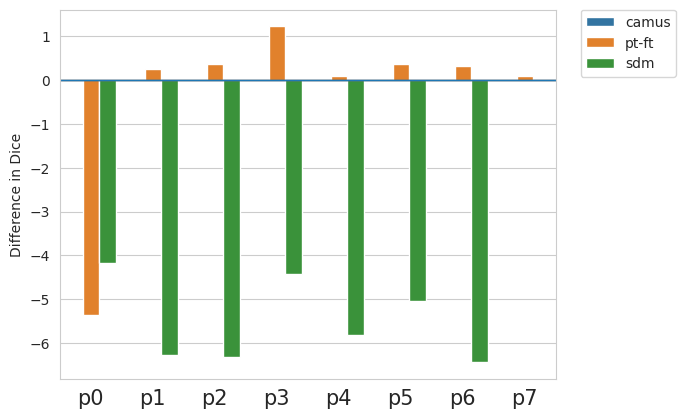

In [46]:
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("tab10"))

diff_bar_plot = sns.barplot(
    data=mean_df,
    x="prompt_type",
    y="diff",
    hue="stage",
)

# increase 0 line linewidth
diff_bar_plot.axhline(0, color="black", linewidth=1)
# color 0 line to tab:blue
diff_bar_plot.axhline(0, color=sns.color_palette("tab10")[0], linewidth=1)

diff_bar_plot.set_ylabel(f"Difference in {metric.capitalize()}")
diff_bar_plot.set_xlabel("")

diff_bar_plot.set(ylim=yrange)
diff_bar_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

diff_bar_plot.tick_params(axis="x", labelsize=x_label_size)
# diff_bar_plot.tick_params(axis="y", labelsize=y_label_size)

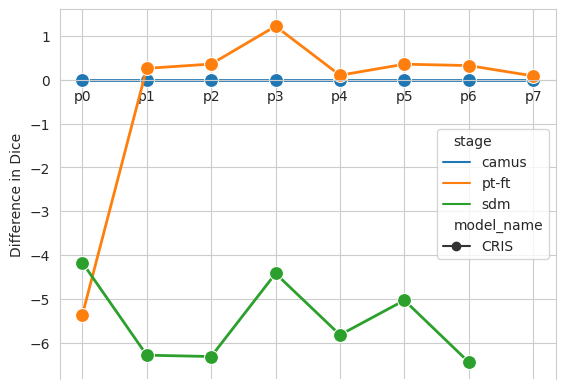

In [19]:

# mean_df = mean_df[mean_df["stage"] != base_stage]
sns.set_style("whitegrid")

metric_plot = sns.lineplot(
    data=mean_df,
    x="prompt_type",
    y="diff",
    hue="stage",
    style="model_name",
    markers=True,
    markersize=10,
    linewidth=linewidth,
)
metric_plot.axes.spines["bottom"].set_position("zero")
metric_plot.set_ylabel(f"Difference in {metric.capitalize()}")
metric_plot.set_xlabel("")



In [34]:
models = "_".join(sorted(set(models)))
fig_name = f"{config_path.stem}_{metric}_{models}_{plot_type}_base_{base_stage}"

fig: Figure = diff_bar_plot.get_figure()
fig.savefig(output_dir / f"{fig_name}.{save_fmt}", bbox_inches="tight")
print(f"Saved figure to {output_dir / f'{fig_name}.{save_fmt}'}")


Saved figure to /mnt/Enterprise/safal/synthetic-boost/plots/real-synthetic-camus_dice_CRIS_diff_base_camus.png
